In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
from sklearn.preprocessing import StandardScaler

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [7]:
! pip install scikit-learn 

In [8]:
df=pd.read_csv("datasetmusic.csv")
df

,name,artists,popularity,album_name,danceability,energy,liveness,valence,tempo,speechiness
0,Ordinary,Alex Warren,95,"You'll Be Alright, Kid (Chapter 1)",0.368,0.694,0.0550,0.391,168.115,0.0600
1,Manchild,Sabrina Carpenter,89,Manchild,0.731,0.685,0.3170,0.811,123.010,0.0572
2,back to friends,sombr,98,back to friends,0.436,0.723,0.0929,0.235,92.855,0.0301
3,Die With A Smile,"Lady Gaga, Bruno Mars",91,MAYHEM,0.519,0.601,0.1260,0.498,157.964,0.0317
4,BIRDS OF A FEATHER,Billie Eilish,100,HIT ME HARD AND SOFT,0.747,0.507,0.1170,0.438,104.978,0.0358
...,...,...,...,...,...,...,...,...,...,...
10254,I Adore You (feat. Daecolm),"HUGEL, Topic, Arash, Daecolm",89,I Adore You (feat. Daecolm),0.704,0.787,0.1590,0.310,119.996,0.0462
10255,NINAO,GIMS,80,LE NORD SE SOUVIENT : L'ODYSSÃ‰E,0.805,0.570,0.1150,0.867,122.984,0.1010
10256,Energy,"Dafina Zeqiri, Luciano",71,Energy,0.800,0.688,0.1520,0.355,116.991,0.0466
10257,APT.,"ROSÃ‰, Bruno Mars",89,rosie,0.777,0.783,0.3550,0.939,149.027,0.2600


In [9]:
# --- 2. Handle Duplicates ---
print("\n--- Handling Duplicates ---")
duplicates_count = df.duplicated(subset=['name', 'artists']).sum()
print(f"Found {duplicates_count} duplicate entries (based on 'name' and 'artists').")

# Remove duplicates, keeping the first occurrence
df_processed = df.drop_duplicates(subset=['name', 'artists'], keep='first')
print(f"Shape after removing duplicates: {df_processed.shape}")


--- Handling Duplicates ---
Found 7998 duplicate entries (based on 'name' and 'artists').
Shape after removing duplicates: (2261, 10)


In [10]:
# --- 3. Filter Data (Example) ---
print("\n--- Filtering by Popularity ---")
original_count = df_processed.shape[0]

# Set your popularity threshold
popularity_threshold = 30
df_processed = df_processed[df_processed['popularity'] > popularity_threshold]

removed_count = original_count - df_processed.shape[0]
print(f"Filtered out {removed_count} songs with popularity <= {popularity_threshold}.")
print(f"Shape after filtering: {df_processed.shape}")


--- Filtering by Popularity ---
Filtered out 32 songs with popularity <= 30.
Shape after filtering: (2229, 10)


In [13]:
# --- 4. Preprocess Features (Scaling) ---
print("\n--- Scaling Numerical Features ---")

# Select the numerical features you want to scale for modeling
numerical_features = ['danceability', 'energy', 'liveness', 'valence', 'tempo', 'speechiness']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy to avoid a warning
df_scaled = df_processed.copy()

# Fit and transform the numerical features
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

print("Successfully scaled numerical features.")
print("\nHead of the scaled data:")
print(df_scaled.head())


--- Scaling Numerical Features ---
Successfully scaled numerical features.

Head of the scaled data:
                 name                artists  popularity  \
0            Ordinary            Alex Warren          95   
1            Manchild      Sabrina Carpenter          89   
2     back to friends                  sombr          98   
3    Die With A Smile  Lady Gaga, Bruno Mars          91   
4  BIRDS OF A FEATHER          Billie Eilish         100   

                           album_name  danceability    energy  liveness  \
0  You'll Be Alright, Kid (Chapter 1)     -2.108860  0.186501 -0.897680   
1                            Manchild      0.452156  0.132773  1.028633   
2                     back to friends     -1.629111  0.359621 -0.619026   
3                              MAYHEM     -1.043534 -0.368679 -0.375664   
4                HIT ME HARD AND SOFT      0.565038 -0.929829 -0.441835   

    valence     tempo  speechiness  
0 -0.716329  1.594730    -0.431839  
1  1.166712 

In [14]:
# --- 5. Save the Processed Data ---
processed_filename = 'preprocessed_music_data.csv'
df_scaled.to_csv(processed_filename, index=False)

print(f"\nPreprocessed data saved to '{processed_filename}'")


Preprocessed data saved to 'preprocessed_music_data.csv'


In [16]:


# --- 6. Calculate Similarity Matrix ---
print("--- Calculating Similarity Matrix ---")

# We only want to compare the numerical features
numerical_features = ['danceability', 'energy', 'liveness', 'valence', 'tempo', 'speechiness']

# Create a matrix of just the numerical features
feature_matrix = df_scaled[numerical_features].values

# Calculate the cosine similarity between all songs
# This creates a (2229, 2229) matrix
similarity_matrix = cosine_similarity(feature_matrix)

print(f"Successfully created similarity matrix.")
print(f"Shape of matrix: {similarity_matrix.shape}")

# You can inspect the similarity between the first two songs
print(f"Example similarity score (Song 0 vs Song 1): {similarity_matrix[0][1]}")

--- Calculating Similarity Matrix ---
Successfully created similarity matrix.
Shape of matrix: (2229, 2229)
Example similarity score (Song 0 vs Song 1): -0.5051515804130208


In [ ]:
# --- 7. Build Recommendation Function ---
print("--- Building Recommendation Function ---")

# Create a 'title' column for easier lookup
df_scaled['title'] = df_scaled['name'] + " by " + df_scaled['artists']

# Create a new series that maps song titles to their index
# This is crucial for quick lookups
indices = pd.Series(df_scaled.index, index=df_scaled['title']).drop_duplicates()

def get_recommendations(song_title, top_n=5):
    """
    Finds the top_n most similar songs for a given song title.
    """
    try:
        # 1. Get the index of the song
        idx = indices[song_title]
    except KeyError:
        return f"Error: Song '{song_title}' not found in the dataset."

    # 2. Get the pairwise similarity scores for this song
    #    This is one row from your similarity_matrix
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # 3. Sort the songs based on similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 4. Get the scores of the top_n most similar songs
    #    (We skip index 1 because it is the song itself)
    sim_scores = sim_scores[1:top_n+1]

    # 5. Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # 6. Return the names of the top_n songs
    return df_scaled['title'].iloc[song_indices]

print("Recommendation function 'get_recommendations' is ready.")

--- Building Recommendation Function ---
Recommendation function 'get_recommendations' is ready.


In [18]:
# --- 8. Test the Function ---

# Example 1
print("Recommendations for 'BIRDS OF A FEATHER by Billie Eilish':")
recs1 = get_recommendations('BIRDS OF A FEATHER by Billie Eilish')
print(recs1)

print("\n")

# Example 2
print("Recommendations for 'Die With A Smile by Lady Gaga, Bruno Mars':")
recs2 = get_recommendations('Die With A Smile by Lady Gaga, Bruno Mars')
print(recs2)

Recommendations for 'BIRDS OF A FEATHER by Billie Eilish':
1503                                      WALLAHI by Shaw
4898                    Als Het Avond Is by Suzan & Freek
120     má»™t bÃ i hÃ¡t khÃ´ng vui máº¥y - Extended Ve...
3048                         Conmigo Se Escapa by Cris Mj
408                          SEVMEYÄ° DENEMEDÄ°N by BLOK3
Name: title, dtype: object


Recommendations for 'Die With A Smile by Lady Gaga, Bruno Mars':
1009                    Your Universe by Rico Blanco
4846                         Idyll by Postgirobygget
3026    La Verdad by Kidd Voodoo, Resonancia EtÃ©rea
490        à¸„à¸§à¸²à¸¡à¸—à¸£à¸‡à¸ˆà¸³ by Musketeers
8238       Ikaw Pa Rin Ang Pipiliin Ko by Cup of Joe
Name: title, dtype: object


Saved feature distribution plot to 'feature_distributions.png'


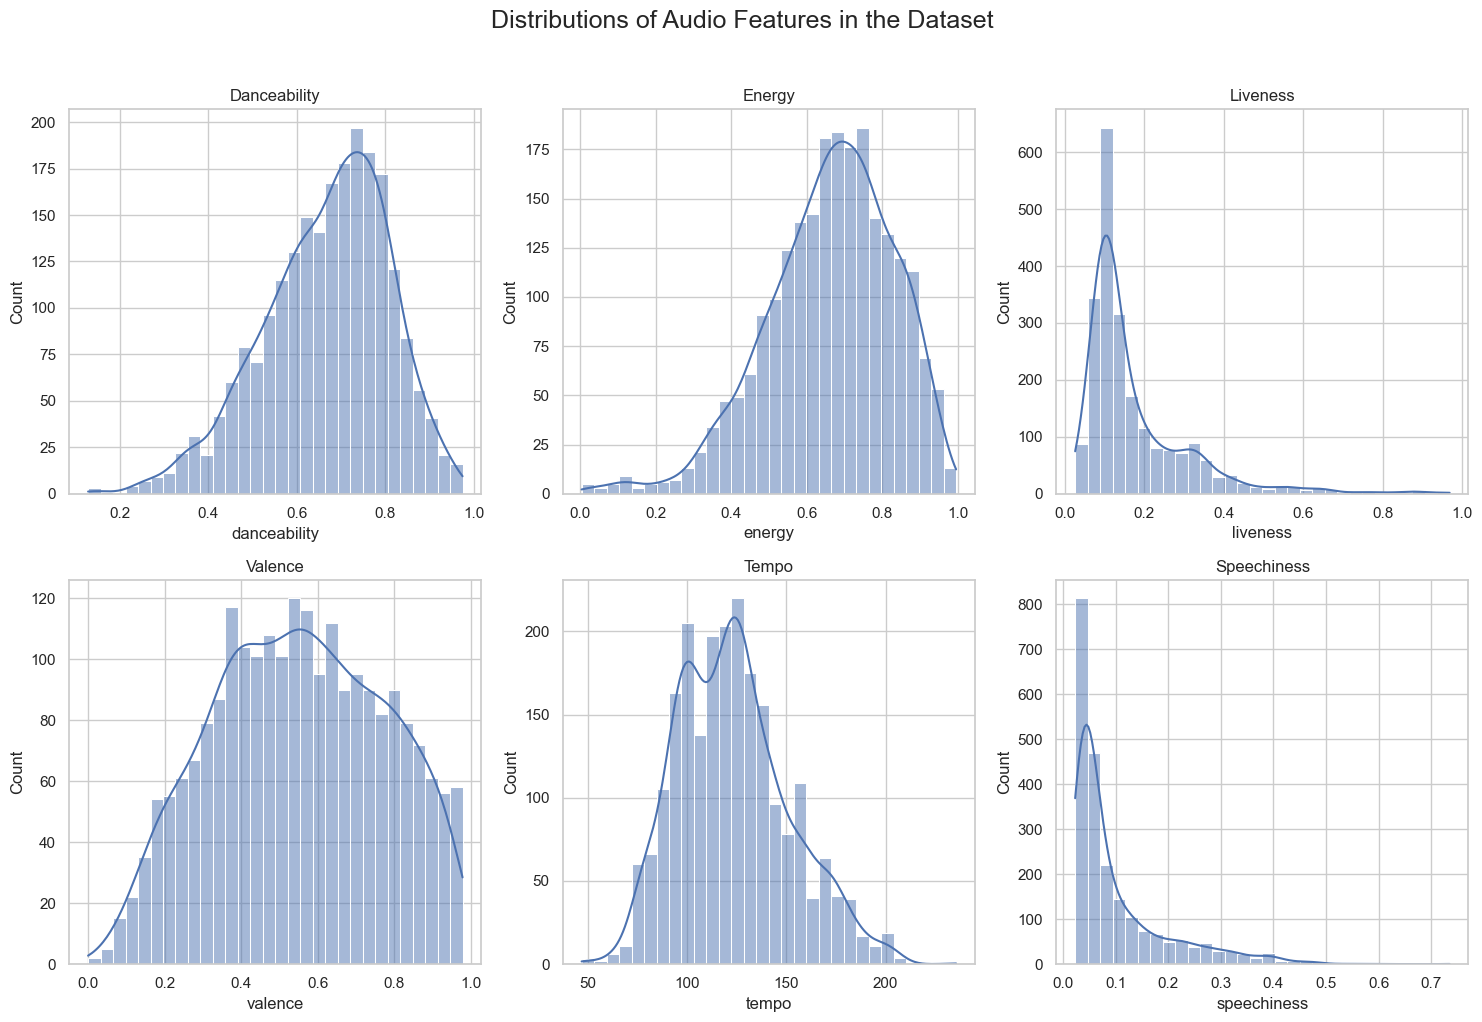

In [19]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the features to plot
numerical_features = ['danceability', 'energy', 'liveness', 'valence', 'tempo', 'speechiness']

# Create the figure for the plots
plt.figure(figsize=(15, 10))
plt.suptitle("Distributions of Audio Features in the Dataset", fontsize=18, y=1.02)

# Loop through each feature and create a histogram
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.histplot(df_processed[feature], kde=True, bins=30)
    plt.title(feature.capitalize())

plt.tight_layout()
plt.savefig('feature_distributions.png')
print("Saved feature distribution plot to 'feature_distributions.png'")


--- Generating Correlation Heatmap ---
Saved correlation heatmap to 'feature_correlation_heatmap.png'


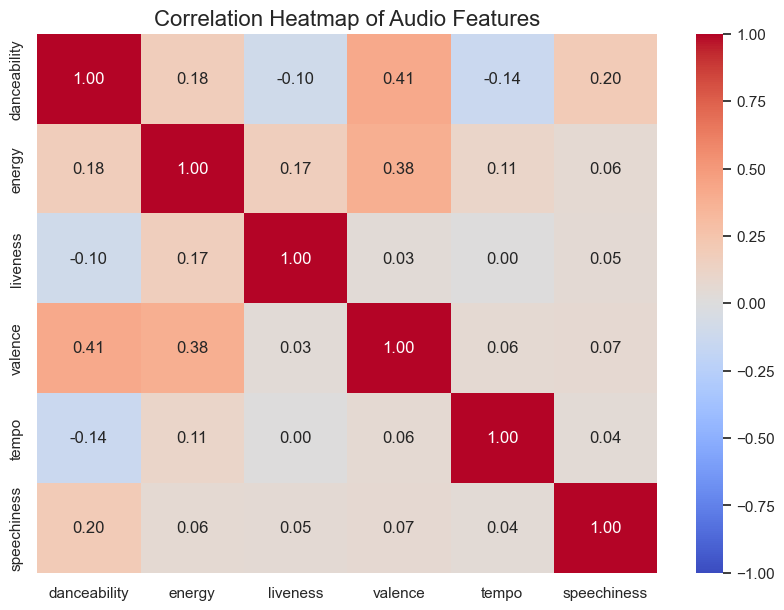

In [20]:
# --- 10. Correlation Heatmap ---
print("\n--- Generating Correlation Heatmap ---")

# Calculate the correlation matrix
corr = df_processed[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Audio Features', fontsize=16)
plt.savefig('feature_correlation_heatmap.png')
print("Saved correlation heatmap to 'feature_correlation_heatmap.png'")


--- Generating Recommendation Radar Chart ---


C:\Users\vansh\AppData\Local\Temp\ipykernel_18152\70235004.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', top_n)


Saved radar chart for 'BIRDS OF A FEATHER by Billie Eilish' to 'recommendation_radar_chart.png'


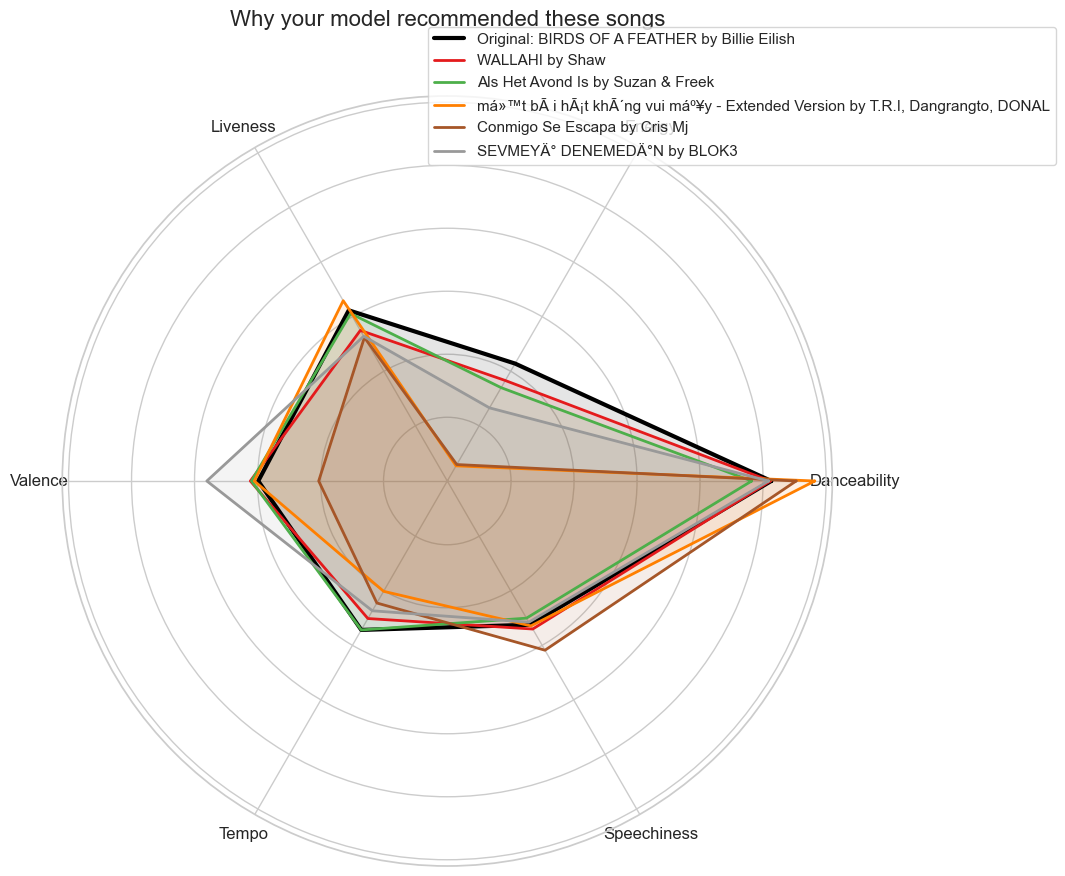

In [21]:
print("\n--- Generating Recommendation Radar Chart ---")

def plot_recommendation_radar(song_title, top_n=5):
    """
    Plots a radar chart for a song and its top_n recommendations.
    """
    try:
        # Get the song's index
        idx = indices[song_title]
    except KeyError:
        print(f"Error: Song '{song_title}' not found.")
        return

    # Get the scaled features for the original song
    original_features = df_scaled.loc[idx, numerical_features].values
    
    # Get the recommendations
    recs = get_recommendations(song_title, top_n=top_n)
    
    # Get the scaled features for the recommended songs
    rec_features = df_scaled.loc[recs.index, numerical_features].values
    
    # --- Create the Radar Plot ---
    labels = [f.capitalize() for f in numerical_features]
    num_vars = len(labels)
    
    # Calculate angles for the plot
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] # Close the circle
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Helper function to plot one song
    def add_to_radar(values, label, color, linestyle='-'):
        plot_values = np.concatenate((values, values[:1])) # Close the circle
        ax.plot(angles, plot_values, color=color, linestyle=linestyle, linewidth=2, label=label)
        ax.fill(angles, plot_values, color=color, alpha=0.1)
    
    # Plot the original song (thicker, black line)
    original_plot_features = np.concatenate((original_features, original_features[:1]))
    ax.plot(angles, original_plot_features, color='black', linewidth=3, linestyle='-', label=f"Original: {song_title}")
    ax.fill(angles, original_plot_features, color='black', alpha=0.1)
    
    # Plot each recommendation
    colors = plt.cm.get_cmap('Set1', top_n)
    for i, (index, row) in enumerate(recs.items()):
        rec_values = rec_features[i]
        add_to_radar(rec_values, row, colors(i))
    
    # Format the plot
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f"Why your model recommended these songs", size=16, y=1.08)
    plt.savefig('recommendation_radar_chart.png', bbox_inches='tight')

# --- Run the function to create the plot ---
# You can change this to any song title from your list
song_to_plot = 'BIRDS OF A FEATHER by Billie Eilish' 
plot_recommendation_radar(song_to_plot)

print(f"Saved radar chart for '{song_to_plot}' to 'recommendation_radar_chart.png'")

In [25]:
recs= get_recommendations('WALLAHI by Shaw')
print(recs)

2399                           MCMG by TOQUEL, FLY LO
3191                     NAME by OBLADAET, Icegergert
70                         Soft by Nasty C, Usimamane
1536              Doberwoman by Valerieblud, Furelise
1465    La Pantera by Marcos Villalobos, Alan Arrieta
Name: title, dtype: object


In [26]:
# --- 12. Save Assets for API ---
print("--- Saving assets for API ---")

# Save the scaled dataframe (which includes the 'title' column)
df_scaled.to_csv('api_data.csv', index=False)
print("Saved 'api_data.csv'")

# Save the similarity matrix
# We use numpy's save function for this
np.save('similarity_matrix.npy', similarity_matrix)
print("Saved 'similarity_matrix.npy'")

print("\nAssets are ready for the Flask app!")

--- Saving assets for API ---
Saved 'api_data.csv'
Saved 'similarity_matrix.npy'

Assets are ready for the Flask app!


In [1]:
import sqlite3
import pandas as pd

# --- 1. Set the database file and the mood to test ---
DB_FILE = 'music.db'
mood_to_test = 'happy'  # <-- Change this to 'angry', 'chill', 'sad', etc.

# --- 2. Copy the mood definitions from your app.py ---
query_filter = ""
if mood_to_test == 'happy':
    query_filter = "WHERE valence > 0.7 AND energy > 0.6 AND danceability > 0.5"
elif mood_to_test == 'sad':
    query_filter = "WHERE valence < 0.3 AND energy < 0.4 AND tempo < 100"
elif mood_to_test == 'energetic':
    query_filter = "WHERE energy > 0.8 AND tempo > 120"
elif mood_to_test == 'calm':
    query_filter = "WHERE energy < 0.3 AND tempo < 100 AND valence > 0.4"
elif mood_to_test == 'romantic':
    query_filter = "WHERE valence > 0.6 AND energy < 0.6 AND speechiness < 0.08"
elif mood_to_test == 'angry':
    query_filter = "WHERE energy > 0.8 AND valence < 0.3 AND tempo > 110"
elif mood_to_test == 'nostalgic':
    query_filter = "WHERE valence > 0.5 AND energy < 0.5 AND tempo < 110"
elif mood_to_test == 'focused':
    query_filter = "WHERE speechiness < 0.05 AND energy < 0.3 AND liveness < 0.1"
else:
    print(f"Error: Mood '{mood_to_test}' not defined.")
    query_filter = None

# --- 3. Connect to the DB and run the query ---
if query_filter:
    try:
        conn = sqlite3.connect(DB_FILE)
        
        # Build the final query
        query = f"""
            SELECT name, artists, title, valence, energy, danceability, tempo
            FROM songs
            {query_filter}
            ORDER BY popularity DESC
            LIMIT 5
        """
        
        print(f"--- Testing mood: '{mood_to_test}' ---")
        print(f"Running SQL query:\n{query}\n")
        
        # Use pandas to read the SQL query into a nice table
        results_df = pd.read_sql_query(query, conn)
        conn.close()
        
        if results_df.empty:
            print("No songs found matching this mood profile.")
        else:
            print("Found the following songs:")
            print(results_df)

    except Exception as e:
        print(f"An error occurred: {e}")

--- Testing mood: 'happy' ---
Running SQL query:

            SELECT name, artists, title, valence, energy, danceability, tempo
            FROM songs
            WHERE valence > 0.7 AND energy > 0.6 AND danceability > 0.5
            ORDER BY popularity DESC
            LIMIT 5
        

Found the following songs:
                           name       artists  \
0                     undressed         sombr   
1                   like JENNIE        JENNIE   
2  Si Antes Te Hubiera Conocido       KAROL G   
3              Mystical Magical  Benson Boone   
4                        Azizam    Ed Sheeran   

                                     title  valence  energy  danceability  \
0                       undressed by sombr    0.888   0.887         0.642   
1                    like JENNIE by JENNIE    0.815   0.743         0.811   
2  Si Antes Te Hubiera Conocido by KAROL G    0.787   0.668         0.924   
3         Mystical Magical by Benson Boone    0.848   0.697         0.671   
4  

--- Found 5 songs for mood: 'happy' ---
                           name  valence  energy
0                     undressed    0.888   0.887
1                   like JENNIE    0.815   0.743
2  Si Antes Te Hubiera Conocido    0.787   0.668
3              Mystical Magical    0.848   0.697
4                        Azizam    0.876   0.899

Saved plot to 'mood_visualization.png'


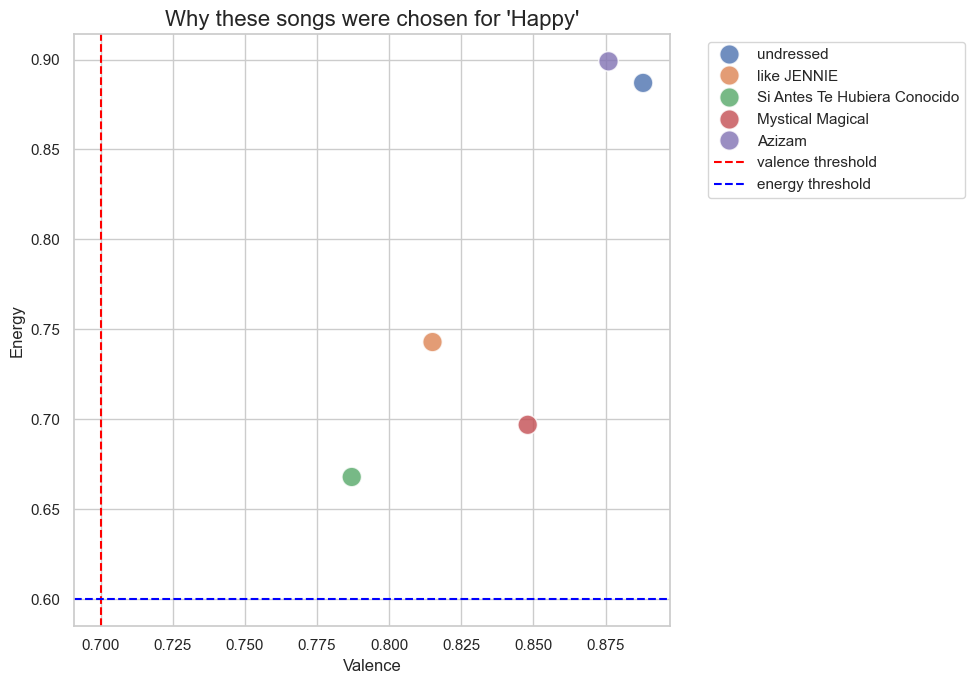

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Set the mood to test and its plot features ---
DB_FILE = 'music.db'
mood_to_test = 'happy'  # <-- Change this to 'angry', 'chill', 'sad', etc.

# --- 2. Define mood profiles AND the features to plot ---
query_filter = ""
plot_features = {}

if mood_to_test == 'happy':
    query_filter = "WHERE valence > 0.7 AND energy > 0.6 AND danceability > 0.5"
    plot_features = {'x': 'valence', 'y': 'energy', 'x_line': 0.7, 'y_line': 0.6}
elif mood_to_test == 'sad':
    query_filter = "WHERE valence < 0.3 AND energy < 0.4 AND tempo < 100"
    plot_features = {'x': 'valence', 'y': 'energy', 'x_line': 0.3, 'y_line': 0.4}
elif mood_to_test == 'energetic':
    query_filter = "WHERE energy > 0.8 AND tempo > 120"
    plot_features = {'x': 'tempo', 'y': 'energy', 'x_line': 120, 'y_line': 0.8}
elif mood_to_test == 'calm':
    query_filter = "WHERE energy < 0.3 AND tempo < 100 AND valence > 0.4"
    plot_features = {'x': 'tempo', 'y': 'energy', 'x_line': 100, 'y_line': 0.3}
elif mood_to_test == 'romantic':
    query_filter = "WHERE valence > 0.6 AND energy < 0.6"
    plot_features = {'x': 'valence', 'y': 'energy', 'x_line': 0.6, 'y_line': 0.6}
elif mood_to_test == 'angry':
    query_filter = "WHERE energy > 0.8 AND valence < 0.3"
    plot_features = {'x': 'valence', 'y': 'energy', 'x_line': 0.3, 'y_line': 0.8}
elif mood_to_test == 'nostalgic':
    query_filter = "WHERE valence > 0.5 AND energy < 0.5"
    plot_features = {'x': 'valence', 'y': 'energy', 'x_line': 0.5, 'y_line': 0.5}
elif mood_to_test == 'focused':
    query_filter = "WHERE speechiness < 0.05 AND energy < 0.3"
    plot_features = {'x': 'speechiness', 'y': 'energy', 'x_line': 0.05, 'y_line': 0.3}
else:
    print(f"Error: Mood '{mood_to_test}' not defined.")
    query_filter = None

# --- 3. Connect to the DB and run the query ---
if query_filter:
    try:
        conn = sqlite3.connect(DB_FILE)
        
        # We need all feature columns for plotting
        query = f"""
            SELECT name, artists, title, valence, energy, danceability, tempo, speechiness, liveness
            FROM songs
            {query_filter}
            ORDER BY popularity DESC
            LIMIT 5
        """
        
        results_df = pd.read_sql_query(query, conn)
        conn.close()
        
        if results_df.empty:
            print(f"No songs found matching the '{mood_to_test}' profile.")
        else:
            print(f"--- Found {len(results_df)} songs for mood: '{mood_to_test}' ---")
            print(results_df[['name', plot_features['x'], plot_features['y']]])
            
            # --- 4. Create the Visualization ---
            plt.figure(figsize=(10, 7))
            sns.set_theme(style="whitegrid")
            
            # Create the scatter plot
            ax = sns.scatterplot(
                data=results_df, 
                x=plot_features['x'], 
                y=plot_features['y'], 
                hue='name',  # Color each dot by song name
                s=200,       # Make dots larger
                alpha=0.8
            )
            
            # Add the threshold lines from our mood profile
            if 'x_line' in plot_features:
                plt.axvline(x=plot_features['x_line'], color='red', linestyle='--', label=f"{plot_features['x']} threshold")
            if 'y_line' in plot_features:
                plt.axhline(y=plot_features['y_line'], color='blue', linestyle='--', label=f"{plot_features['y']} threshold")

            # Format the plot
            plt.title(f"Why these songs were chosen for '{mood_to_test.capitalize()}'", fontsize=16)
            plt.xlabel(plot_features['x'].capitalize(), fontsize=12)
            plt.ylabel(plot_features['y'].capitalize(), fontsize=12)
            
            # Move legend outside the plot
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.tight_layout()
            plt.savefig('mood_visualization.png')
            print("\nSaved plot to 'mood_visualization.png'")
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")